In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
cities

['atuona',
 'cape town',
 'esso',
 'langsa',
 'dikson',
 'padang',
 'vaini',
 'ribeira grande',
 'upernavik',
 'frunzivka',
 'punta arenas',
 'kaitangata',
 'ilheus',
 'salalah',
 'karratha',
 'rikitea',
 'myitkyina',
 'puunsi',
 'carnarvon',
 'marcona',
 'hilo',
 'jamestown',
 'birin',
 'butaritari',
 'ushuaia',
 'oskarshamn',
 'orzu',
 'sitka',
 'erenhot',
 'mering',
 'porto walter',
 'takoradi',
 'nikolskoye',
 'kanniyakumari',
 'pingliang',
 'illoqqortoormiut',
 'tasiilaq',
 'vasterhaninge',
 'hobart',
 'oga',
 'hermanus',
 'east london',
 'luderitz',
 'lavrentiya',
 'kizner',
 'iralaya',
 'rafaela',
 'praia da vitoria',
 'paraiso',
 'dauphin',
 'port elizabeth',
 'lolua',
 'puerto ayora',
 'esperance',
 'bubaque',
 'tonantins',
 'ambon',
 'vaitupu',
 'tiksi',
 'morondava',
 'new norfolk',
 'mataura',
 'ginda',
 'vanavara',
 'port alfred',
 'sao felix do xingu',
 'whitehorse',
 'kahului',
 'mar del plata',
 'nanortalik',
 'kapaa',
 'busselton',
 'christchurch',
 'albany',
 'sept-il

In [8]:
# Import the requests library.
import requests

#Import the API key.
from config1 import weather_api_key

In [9]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
    
     #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | esso
Processing Record 4 of Set 1 | langsa
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | frunzivka
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | ilheus
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | myitkyina
Processing Record 18 of Set 1 | puunsi
City not found. Skipping...
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | jamestown

Processing Record 39 of Set 4 | blagoyevo
Processing Record 40 of Set 4 | eislingen
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | wanning
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | pontes e lacerda
Processing Record 46 of Set 4 | kuito
Processing Record 47 of Set 4 | tateyama
Processing Record 48 of Set 4 | umm kaddadah
Processing Record 49 of Set 4 | aksha
Processing Record 50 of Set 4 | yuxia
Processing Record 1 of Set 5 | dejen
Processing Record 2 of Set 5 | bonfim
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | riyadh
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | mayor pablo lagerenza
Processing Record 8 of Set 5 | shieli
Processing Record 9 of Set 5 | burkhala
City not found. Skipping...
Processing Record 10 of Set 5 | mys shmidta
City not found. Skipping...
Pro

Processing Record 28 of Set 8 | avera
Processing Record 29 of Set 8 | almaznyy
Processing Record 30 of Set 8 | brunico
Processing Record 31 of Set 8 | leeuwarden
Processing Record 32 of Set 8 | stolin
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | oktyabrskiy
Processing Record 35 of Set 8 | ituni
City not found. Skipping...
Processing Record 36 of Set 8 | banmo
City not found. Skipping...
Processing Record 37 of Set 8 | tonstad
Processing Record 38 of Set 8 | sindou
Processing Record 39 of Set 8 | louis trichardt
Processing Record 40 of Set 8 | durazno
Processing Record 41 of Set 8 | elizabeth city
Processing Record 42 of Set 8 | rakitnoye
Processing Record 43 of Set 8 | mitsamiouli
Processing Record 44 of Set 8 | nalut
Processing Record 45 of Set 8 | nguiu
City not found. Skipping...
Processing Record 46 of Set 8 | alihe
Processing Record 47 of Set 8 | benghazi
Processing Record 48 of Set 8 | mayo
Processing Record 49 of Set 8 | chuy
Processing Record 50 of Set

Processing Record 13 of Set 12 | stribro
Processing Record 14 of Set 12 | praya
Processing Record 15 of Set 12 | hofn
Processing Record 16 of Set 12 | yoichi
Processing Record 17 of Set 12 | koungou
Processing Record 18 of Set 12 | anloga
Processing Record 19 of Set 12 | tranas
Processing Record 20 of Set 12 | yazman
Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | san fernando
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | caborca
Processing Record 25 of Set 12 | cayhagan
Processing Record 26 of Set 12 | san jeronimo
Processing Record 27 of Set 12 | muli
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | srandakan
Processing Record 30 of Set 12 | shahr-e kord
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | antalaha
Processing Record 33 of Set 12 | presidencia roque saenz pena
Processing Record 34 of Set 12 | ahipara
Processing Record 35 of Set 12 | khonuu
City not found. Skippin

In [12]:
len(city_data)

563

In [13]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.61,75,32,23.73,PF,2021-07-16 19:42:01
1,Cape Town,-33.9258,18.4232,55.11,94,0,3.44,ZA,2021-07-16 19:42:02
2,Esso,55.9333,158.7000,59.68,84,100,3.53,RU,2021-07-16 19:42:02
3,Langsa,4.4683,97.9683,75.36,94,99,2.46,ID,2021-07-16 19:42:02
4,Dikson,73.5069,80.5464,34.99,89,100,9.64,RU,2021-07-16 19:42:03
5,Padang,-0.9492,100.3543,75.74,77,67,3.91,ID,2021-07-16 19:42:03
6,Vaini,-21.2000,-175.2000,73.56,94,75,6.91,TO,2021-07-16 19:42:03
7,Ribeira Grande,38.5167,-28.7000,70.20,60,20,13.80,PT,2021-07-16 19:42:04
8,Upernavik,72.7868,-56.1549,46.51,60,100,33.42,GL,2021-07-16 19:42:04
9,Frunzivka,47.3333,29.7500,76.39,51,100,5.12,UA,2021-07-16 19:42:05


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-07-16 19:42:01,-9.8000,-139.0333,77.61,75,32,23.73
1,Cape Town,ZA,2021-07-16 19:42:02,-33.9258,18.4232,55.11,94,0,3.44
2,Esso,RU,2021-07-16 19:42:02,55.9333,158.7000,59.68,84,100,3.53
3,Langsa,ID,2021-07-16 19:42:02,4.4683,97.9683,75.36,94,99,2.46
4,Dikson,RU,2021-07-16 19:42:03,73.5069,80.5464,34.99,89,100,9.64
5,Padang,ID,2021-07-16 19:42:03,-0.9492,100.3543,75.74,77,67,3.91
6,Vaini,TO,2021-07-16 19:42:03,-21.2000,-175.2000,73.56,94,75,6.91
7,Ribeira Grande,PT,2021-07-16 19:42:04,38.5167,-28.7000,70.20,60,20,13.80
8,Upernavik,GL,2021-07-16 19:42:04,72.7868,-56.1549,46.51,60,100,33.42
9,Frunzivka,UA,2021-07-16 19:42:05,47.3333,29.7500,76.39,51,100,5.12


In [16]:
# Create the output file (CSV).
output_data_file = "weather_database/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'07/16/21'

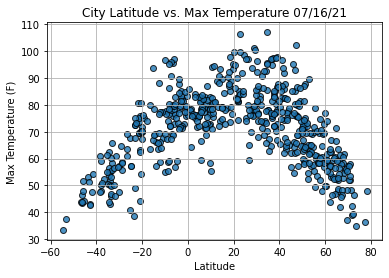

In [19]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_database/Fig1.png")

#Show plot.
plt.show()

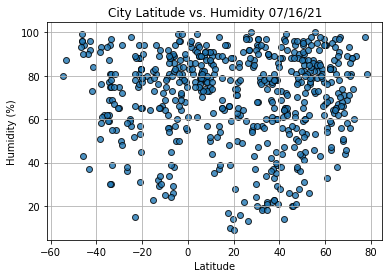

In [20]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_database/Fig2.png")

#Show plot.
plt.show()

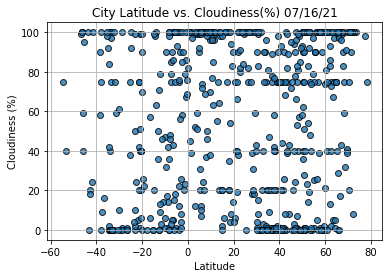

In [21]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_database/Fig3.png")

#Show plot.
plt.show()

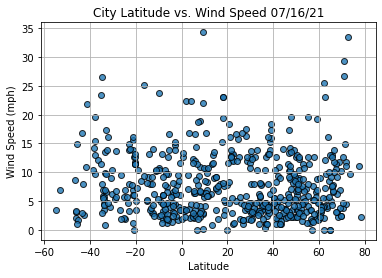

In [22]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_database/Fig4.png")

#Show plot.
plt.show()

In [23]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [24]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [25]:
index13 = city_data_df.loc[13]
index13

City                      Salalah
Country                        OM
Date          2021-07-16 19:42:06
Lat                       17.0151
Lng                       54.0924
Max Temp                    78.89
Humidity                       94
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
558    False
559     True
560     True
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Esso,RU,2021-07-16 19:42:02,55.9333,158.7000,59.68,84,100,3.53
3,Langsa,ID,2021-07-16 19:42:02,4.4683,97.9683,75.36,94,99,2.46
4,Dikson,RU,2021-07-16 19:42:03,73.5069,80.5464,34.99,89,100,9.64
7,Ribeira Grande,PT,2021-07-16 19:42:04,38.5167,-28.7000,70.20,60,20,13.80
8,Upernavik,GL,2021-07-16 19:42:04,72.7868,-56.1549,46.51,60,100,33.42


In [28]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

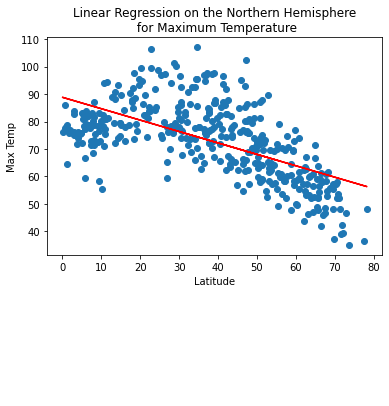

The r-value is -0.618


In [29]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

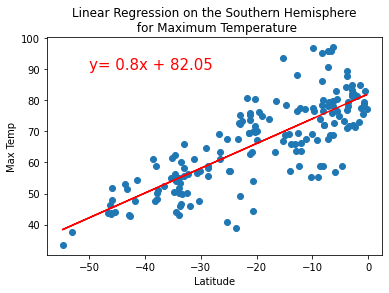

The r-value is 0.790


In [30]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

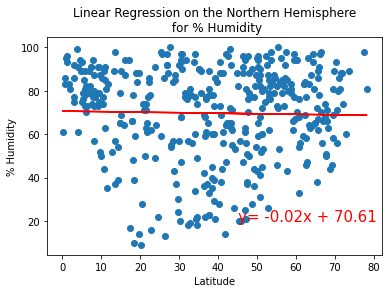

The r-value is -0.023


In [31]:

#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))